# Notebook 1
pandas, pyplot, numpy и sklearn(немного)

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [110]:
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error

In [11]:
res = pd.read_csv('titanic_good_data.csv')
res1 = pd.read_csv('titanic_good_data_without_fare.csv')

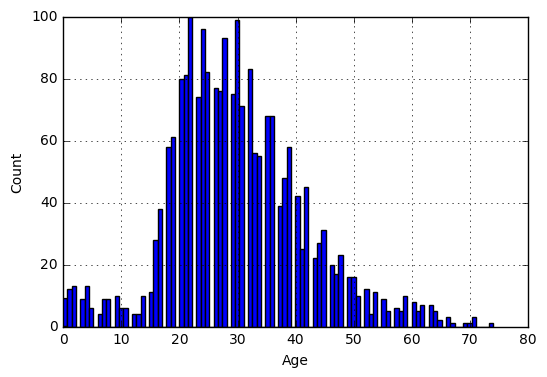

In [7]:
res.Age.hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Count')

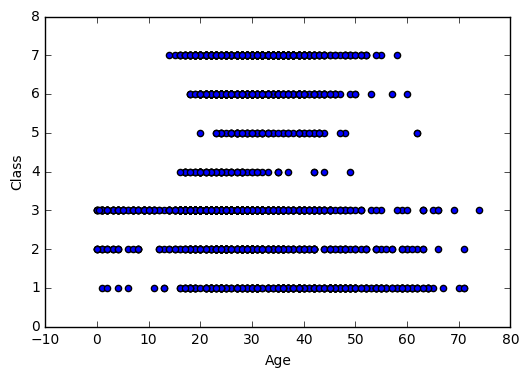

In [145]:
plt.scatter(res.Age, res['Class/Dept'])
plt.xlabel('Age')
plt.ylabel('Class')

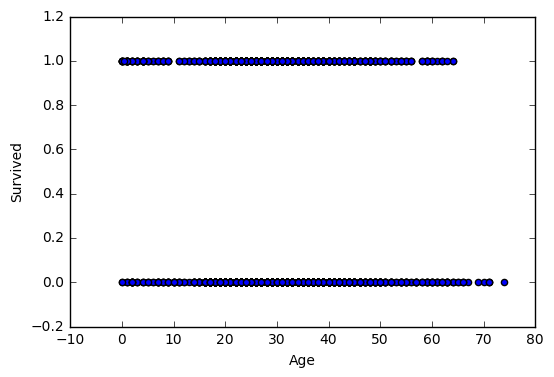

In [9]:
plt.scatter(res.Age, res.Survived)
plt.xlabel('Age') 
plt.ylabel('Survived')

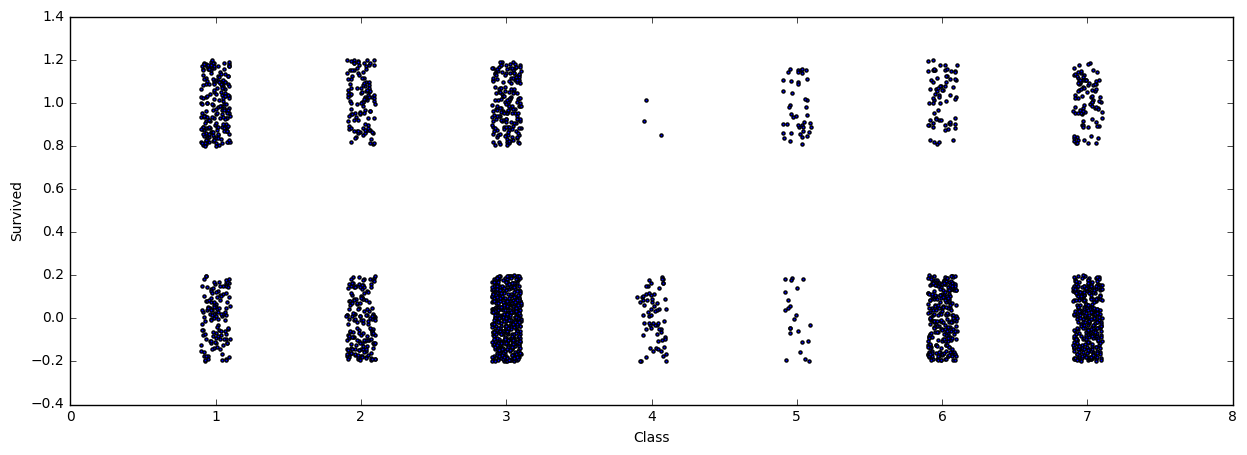

In [10]:
plt.figure(figsize=[15,5])
plt.scatter(res['Class/Dept']+np.random.uniform(-0.1, 0.1, len(res)), res.Survived+np.random.uniform(-0.2, 0.2, len(res)), s=5)
plt.xlabel('Class')
plt.ylabel('Survived')
#По такой визуализации видно, что, допустим, больше половины людей из 1 класса спаслось, а почти все люди из 4
#класса погибли.

In [138]:
resres = res1.copy()
resres.dropna(how='any')

res1.dropna(how='any', inplace=True)
res1.to_csv('titanic_good_data_without_fare.csv')

In [140]:
titanic_model = DecisionTreeClassifier(random_state=1)
X = res1[['Age', 'Class/Dept', 'Sex']]
y = res1[['Survived']]

In [141]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 3)

In [142]:
titanic_model.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [143]:
validation = titanic_model.predict(val_X) == np.array(val_y)

In [144]:
validation

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True,  True],
       ..., 
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

Вроде ничего такой прогноз.